# Annotation Example

This is just a temporary template to show how to operate with annotation UI

## Imports

In [2]:
%load_ext autoreload
%autoreload 2

In [61]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

from IPython.display import clear_output

from project.scripts.annotation import AnnotationUI
from project.scripts.preprocessing import resize_image, cut_coins, filter_circles
from project.scripts.viz_utils import show_image

## Preprocessing

Download images and unzip them.

In [ ]:
# download the data
! kaggle competitions download -c iapr24-coin-counter
! unzip iapr24-coin-counter.zip && rm iapr24-coin-counter.zip

# clear the output for cleaner notebook
clear_output()

## Hough Transform

It will be properly implemented by Armando. For the time being I use simple setup with 1 image.

In [4]:
img_path = 'train/1. neutral_bg/L1010277.JPG'

In [5]:
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
img_color = cv.imread(img_path)

img_resized = resize_image(img, 0.8)
img_color_resized =  resize_image(img_color, 0.8)

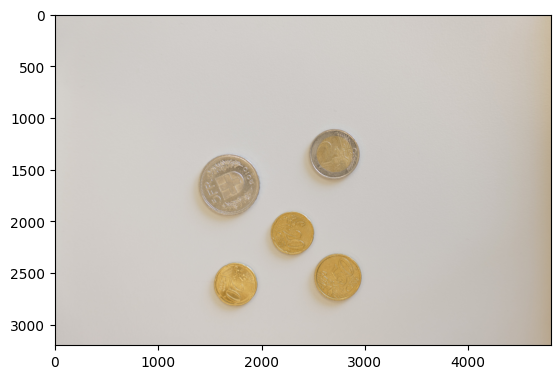

In [6]:
_ = plt.imshow(img_color_resized[:,:,::-1])

In [63]:
img_blurred = cv.medianBlur(img_resized, 5)

### Simple Hough Transform

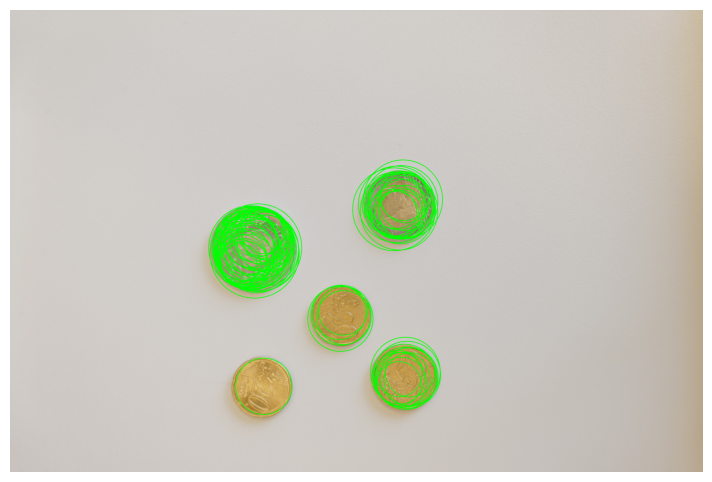

In [68]:
circles = cv.HoughCircles(img_blurred, cv.HOUGH_GRADIENT, 1, 20, param1=200, param2=30, minRadius=140, maxRadius=600)
circles = np.uint16(np.around(circles))
plot_img = img_color_resized.copy()

for (x, y, r) in circles[0, :]:
        cv.circle(plot_img, (x, y), r, (0, 255, 0), 4)

show_image(plot_img, is_rgb=False)

### Filtering Overlapping Circles

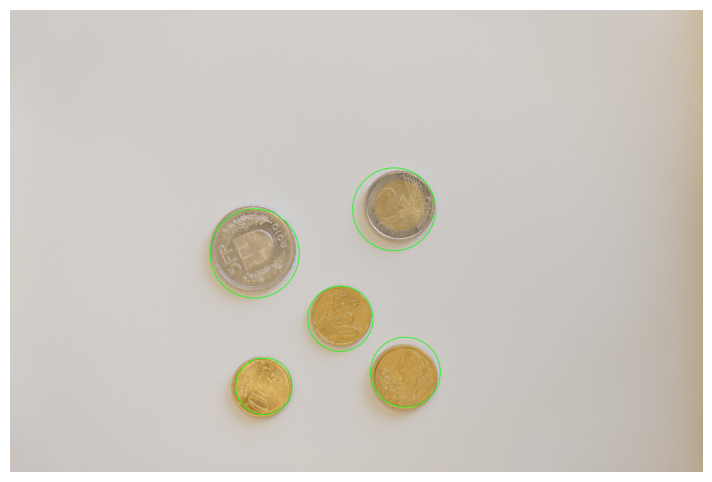

In [69]:
circles = filter_circles(circles)
plot_img = img_color_resized.copy()

for (x, y, r) in circles:
        cv.circle(plot_img, (x, y), r, (0, 255, 0), 4)

show_image(plot_img, is_rgb=False)

### Cut Coins from Original Image

In [70]:
coins = cut_coins(img_color_resized, circles)

### Annotate

After you have finished annotating 5 example coins, the images will be saved alongside labels to a directory.

In [58]:
ui = AnnotationUI(coins)
ui.display()